In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import Model, Input, layers, losses, activations, ops, callbacks, models
from sklearn.model_selection import train_test_split
import pandas as pd
import json
import glob
import pandas as pd
from datetime import timedelta, datetime

In [8]:
@keras.saving.register_keras_serializable()
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.seed_generator = keras.random.SeedGenerator(1337)

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = ops.shape(z_mean)[0]
        dim = ops.shape(z_mean)[1]
        epsilon = keras.random.normal(shape=(batch, dim), seed=self.seed_generator)
        return z_mean + ops.exp(0.5 * z_log_var) * epsilon

In [10]:
from keras import models

encoder = models.load_model("models/encoder.keras", compile=False)
decoder = models.load_model("models/decoder.keras", compile=False)
vae = models.load_model("models/vae.keras", compile=False)

In [26]:
def plot_hr(data):
    plt.figure(figsize=(18, 4))
    plt.plot(data)
    plt.ylim(0,200)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


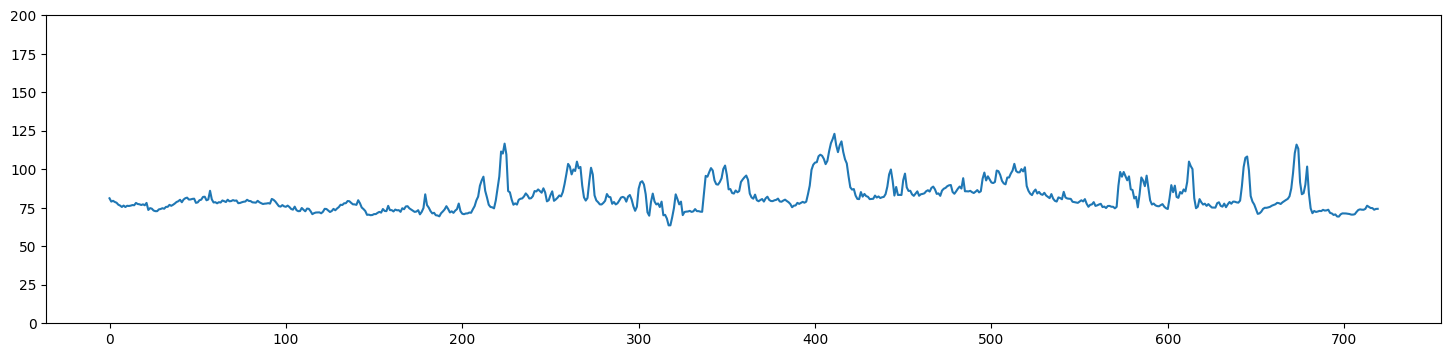

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


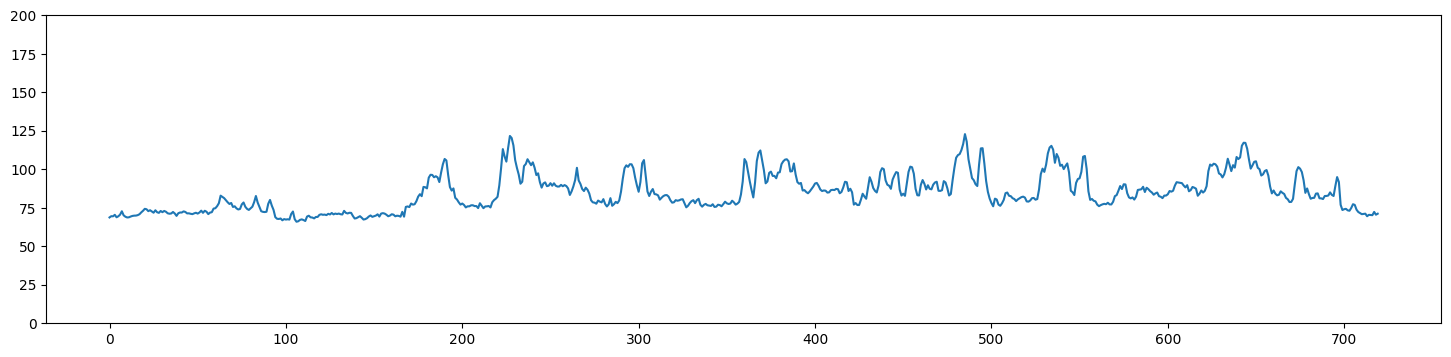

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


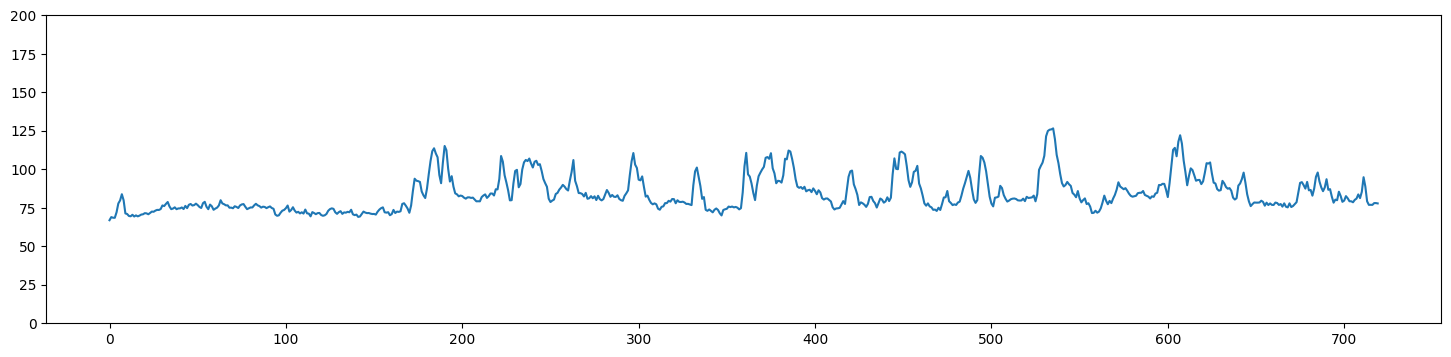

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


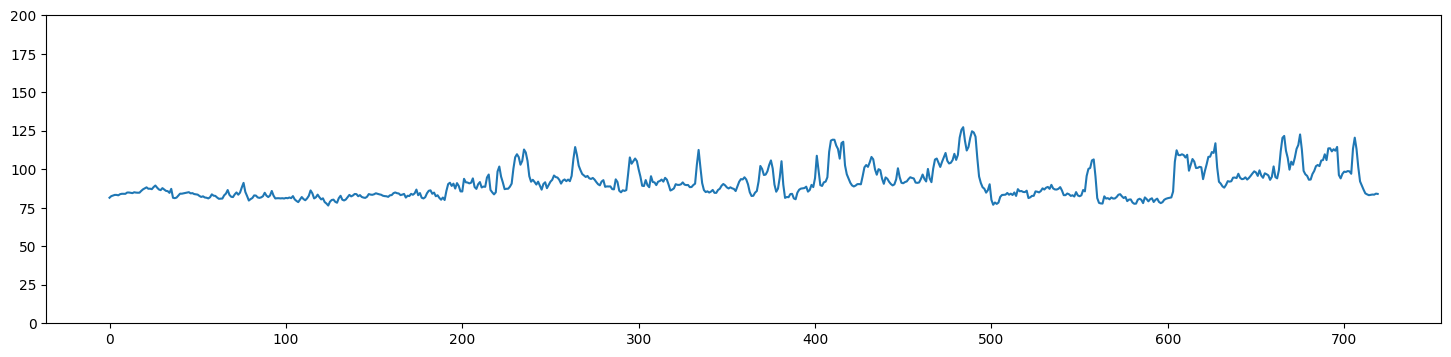

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


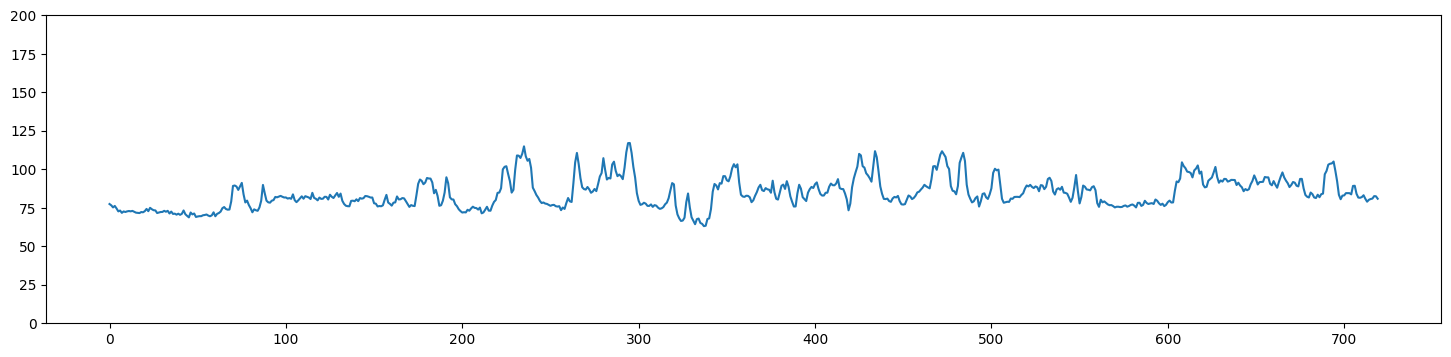

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


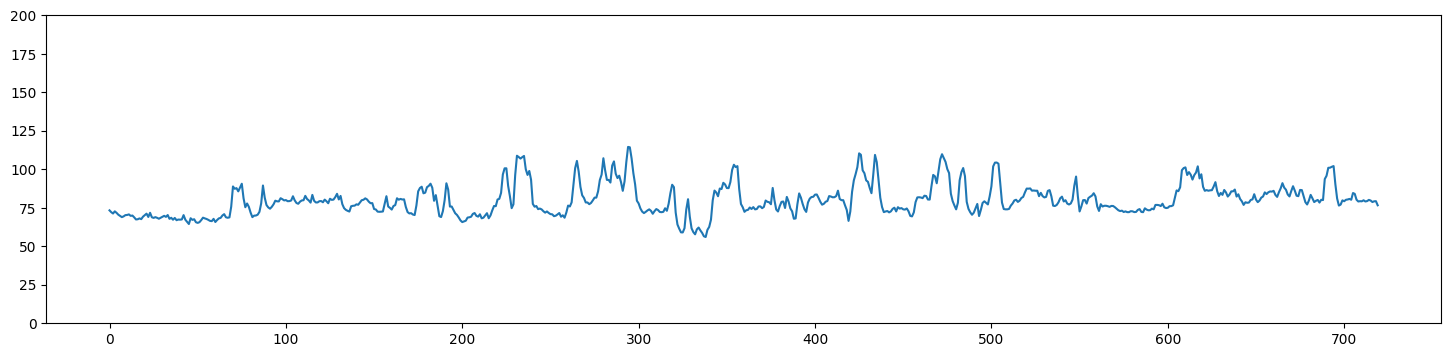

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


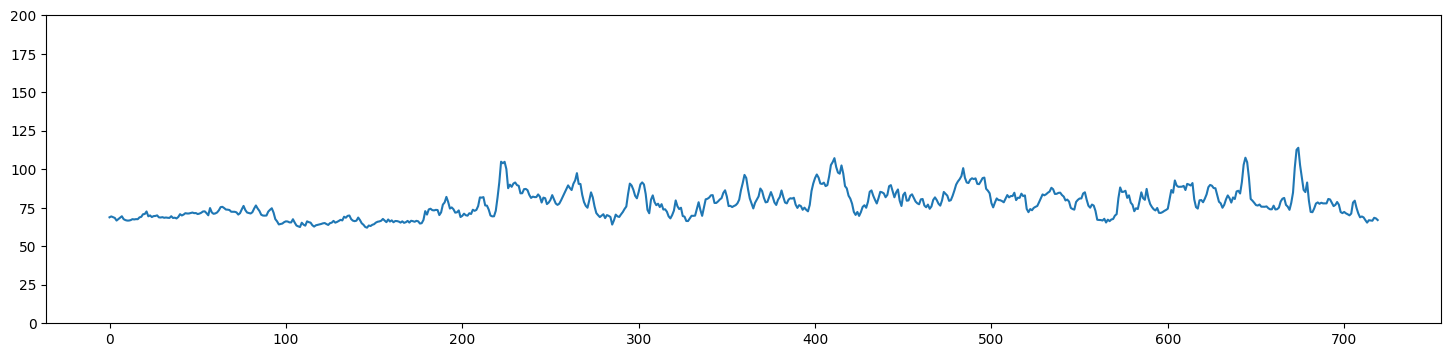

In [36]:
df = pd.read_csv('fitabase/data/heartrate_seconds_merged.csv')

df = df[df['Id'] == 2022484408]
df['timestamp'] = pd.to_datetime(df['Time'], format="%m/%d/%Y %I:%M:%S %p")

df['val'] = df['Value'].astype('float32') / 250.0

# The day of the week with Monday=0, Sunday=6
realdata_by_dayno = {i: df[df["timestamp"].dt.weekday == i] for i in range(7)}

for i in range(7):
    mean = realdata_by_dayno[i]['val'].mean()
    std = realdata_by_dayno[i]['val'].std()

    randombase = np.random.normal(loc=mean, scale=std,size=(1, 720))
    randombase = vae.predict(randombase)
    plot_hr(randombase[0]*250)

